In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [3]:
# import and format data set

df = pd.DataFrame(pd.read_excel('Austin_Housing_Data.xlsx'))

df.columns = ['Close Price', 'Green Building Verification', 'Green Energy Count', 'Green Energy Efficient', 
              'Green Sustainability', 'Accessibility Features', 'Bedroom Count', 'Garage Space Count', 
              'Homeowner Association', 'Latitude', 'Longitude', 'Occupant Type', 'Off Market Month', 
              'Off Market Year', 'Patio & Porch Features', 'Private Pool', 'Property Condition at Sale', 
              'Security Features', 'Square Feet', 'View', 'Year Built']

df = df.dropna()

df = df.astype({"Close Price": int, "Green Building Verification": int, "Green Energy Count": int, 
                "Green Energy Efficient": int, "Green Sustainability": int, "Accessibility Features": int,
                "Bedroom Count": int, "Garage Space Count": int, "Homeowner Association": int, "Latitude": float, 
                "Longitude": float, "Occupant Type": int, "Off Market Month": int, "Off Market Year": int, 
                "Patio & Porch Features": int, "Private Pool": int, "Property Condition at Sale": int, 
                "Security Features": int, "Square Feet": int, "View": int, "Year Built": int})

df['Close Price'] = np.log10(df['Close Price'])

df

,Close Price,Green Building Verification,Green Energy Count,Green Energy Efficient,Green Sustainability,Accessibility Features,Bedroom Count,Garage Space Count,Homeowner Association,Latitude,...,Occupant Type,Off Market Month,Off Market Year,Patio & Porch Features,Private Pool,Property Condition at Sale,Security Features,Square Feet,View,Year Built
0,5.593286,0,0,0,0,0,3,2,1,30.374141,...,1,1,2020,1,0,2,0,1769,1,1980
1,5.698970,0,0,0,0,0,3,2,0,30.369408,...,0,4,2020,0,0,1,0,1837,0,1971
2,5.720159,0,0,0,0,0,3,2,0,30.363739,...,0,3,2020,1,0,3,0,1974,0,1968
3,5.739572,0,0,0,0,0,2,2,1,30.365050,...,0,4,2020,1,0,3,0,1810,1,1994
4,5.741939,0,0,0,0,0,3,2,0,30.384092,...,1,2,2020,0,0,3,1,1778,1,1978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30995,6.675778,0,0,0,0,0,4,4,1,30.273602,...,0,9,2022,1,1,4,1,7595,1,2004
30996,6.693727,0,0,1,1,0,7,3,1,30.263692,...,0,10,2022,1,1,5,1,5840,1,2016
30997,6.775610,0,0,0,0,0,5,4,1,30.270601,...,1,9,2022,1,1,4,1,5788,1,2014
30998,6.778151,0,0,0,0,0,4,3,1,30.264762,...,0,12,2021,1,1,5,1,6013,1,2021


In [4]:
import xgboost as xgb
import shap

In [5]:
# train an XGBoost model

y = df['Close Price']

X = df[['Green Building Verification', 'Green Energy Count', 'Green Energy Efficient', 'Green Sustainability', 
      'Accessibility Features', 'Bedroom Count', 'Garage Space Count', 'Homeowner Association', 'Latitude', 
      'Longitude', 'Occupant Type', 'Off Market Month', 'Off Market Year', 'Patio & Porch Features', 'Private Pool', 
      'Property Condition at Sale', 'Security Features', 'Square Feet', 'View', 'Year Built']]

model = xgb.XGBRegressor(max_depth = 6).fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


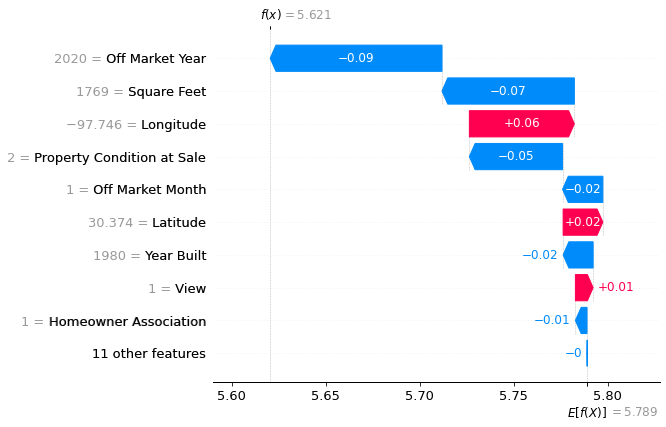

In [6]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

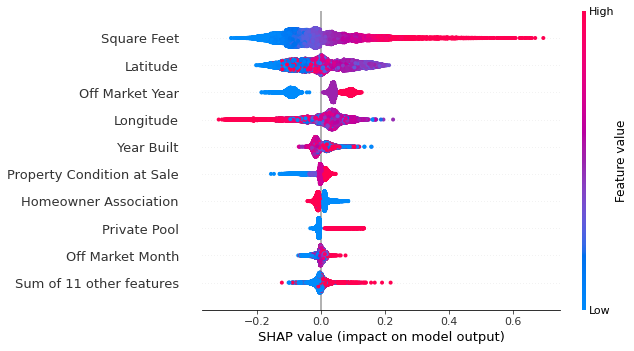

In [7]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

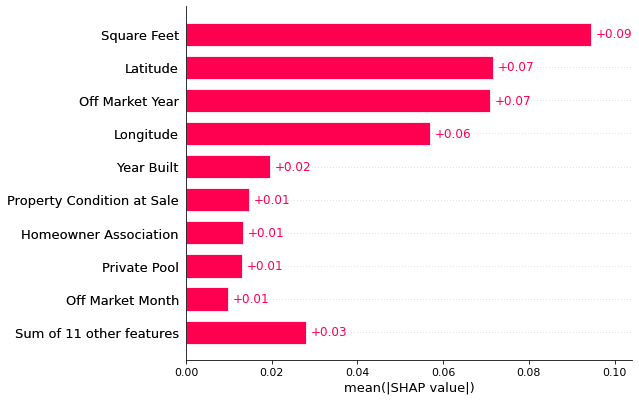

In [8]:
# summarize the effects of all the features in a bar plot
shap.plots.bar(shap_values)

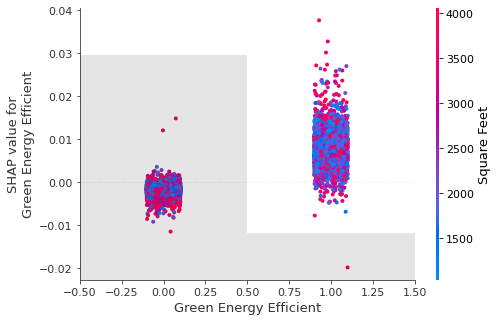

In [9]:
# Green Energy Efficient & Square Feet dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Energy Efficient"], color=shap_values[:,"Square Feet"])

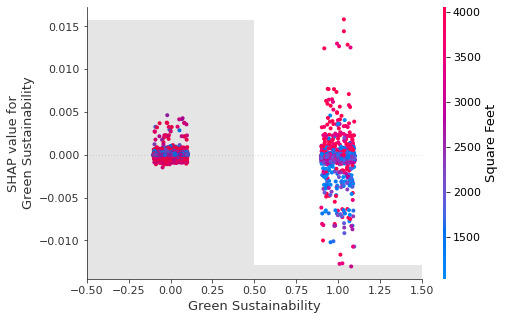

In [10]:
# Green Sustainability & Square Feet dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Sustainability"], color=shap_values[:,"Square Feet"])

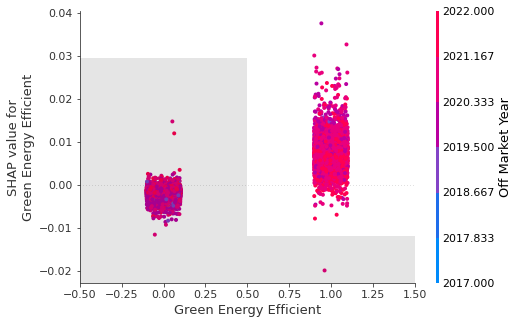

In [11]:
# Green Energy Efficient & Off Market Year dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Energy Efficient"], color=shap_values[:,"Off Market Year"])

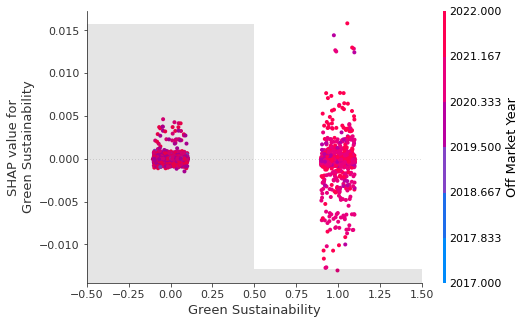

In [12]:
# Green Sustainability & Off Market Year dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Sustainability"], color=shap_values[:,"Off Market Year"])

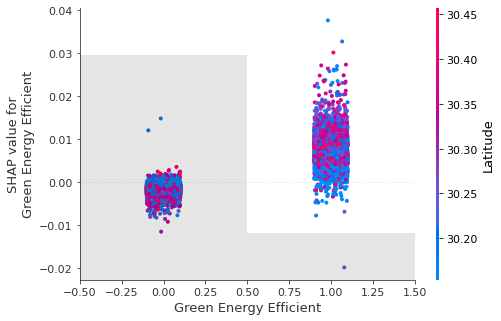

In [13]:
# Green Energy Efficient & Latitude dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Energy Efficient"], color=shap_values[:,"Latitude"])

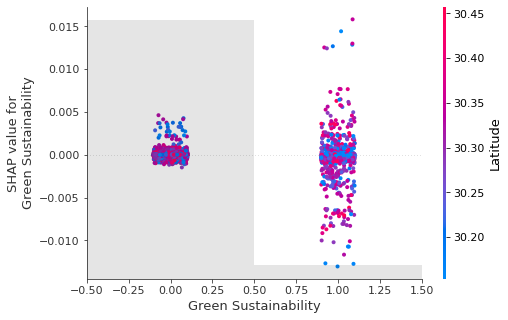

In [14]:
# Green Sustainability & Latitude dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Sustainability"], color=shap_values[:,"Latitude"])

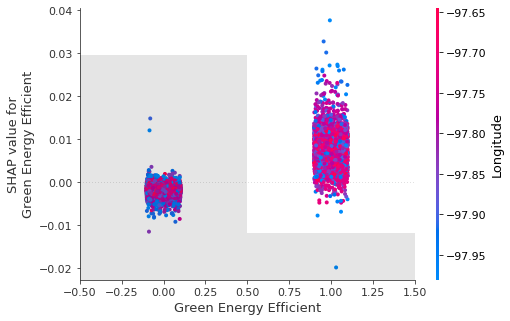

In [15]:
# Green Energy Efficient & Longitude dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Energy Efficient"], color=shap_values[:,"Longitude"])

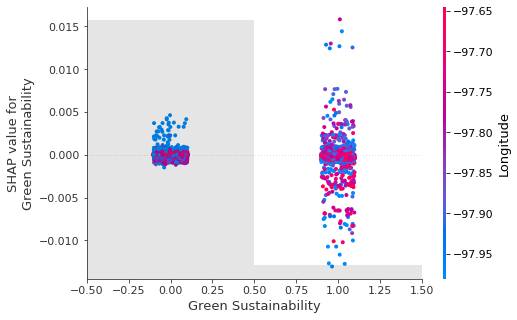

In [16]:
# Green Sustainability & Longitude dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Sustainability"], color=shap_values[:,"Longitude"])

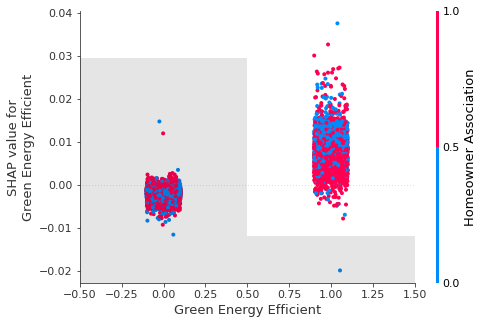

In [17]:
# Green Energy Efficient & Homeowner Association dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Energy Efficient"], color=shap_values[:,"Homeowner Association"])

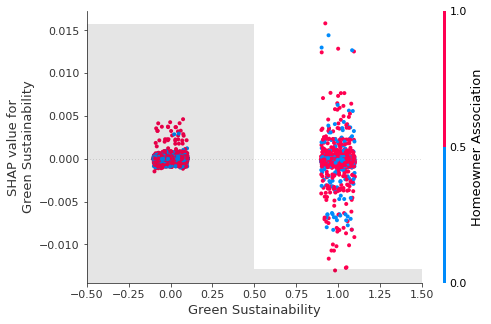

In [18]:
# Green Sustainability & Homeowner Association dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Sustainability"], color=shap_values[:,"Homeowner Association"])

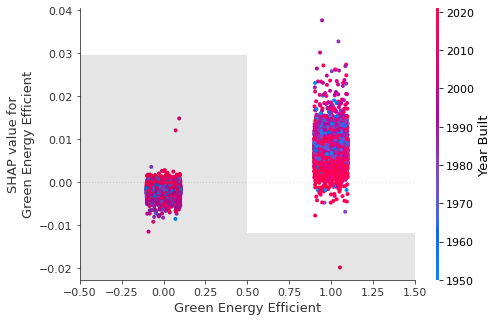

In [19]:
# Green Energy Efficient & Year Built dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Energy Efficient"], color=shap_values[:,"Year Built"])

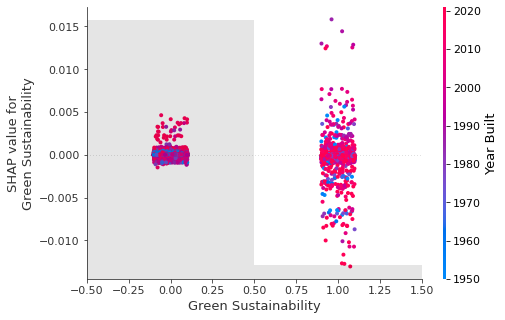

In [20]:
# Green Sustainability & Year Built dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Sustainability"], color=shap_values[:,"Year Built"])

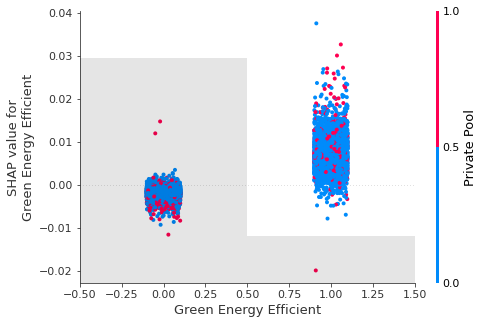

In [21]:
# Green Energy Efficient & Private Pool dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Energy Efficient"], color=shap_values[:,"Private Pool"])

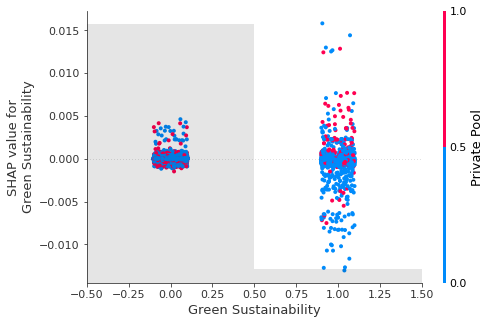

In [22]:
# Green Sustainability & Private Pool dependence scatter plot
shap.plots.scatter(shap_values[:,"Green Sustainability"], color=shap_values[:,"Private Pool"])

In [23]:
# create a CSV file with the SHAP values
pd.DataFrame(shap_values.values, columns=X.columns).to_csv('SHAP_Values.csv')

# create a CSV file with original values and the SHAP values
pd.DataFrame(shap_values.values, columns=X.columns).join(df, lsuffix="_SHAP").to_csv('All_Housing_Data.csv')